# 소수 찾기

## - 문제설명

한자리 숫자가 적힌 종이 조각이 흩어져있습니다. 흩어진 종이 조각을 붙여 소수를 몇 개 만들 수 있는지 알아내려 합니다.

각 종이 조각에 적힌 숫자가 적힌 문자열 numbers가 주어졌을 때, 종이 조각으로 만들 수 있는 소수가 몇 개인지 return 하도록 solution 함수를 완성해주세요.


## - 제한조건

*  numbers는 길이 1 이상 7 이하인 문자열입니다.
*  numbers는 0~9까지 숫자만으로 이루어져 있습니다.
*  "013"은 0, 1, 3 숫자가 적힌 종이 조각이 흩어져있다는 의미입니다.

## - 입출력 예

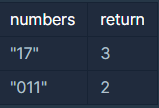

## - 입출력 예 설명

*  예제 #1
[1, 7]으로는 소수 [7, 17, 71]를 만들 수 있습니다.

*  예제 #2
[0, 1, 1]으로는 소수 [11, 101]를 만들 수 있습니다.

11과 011은 같은 숫자로 취급합니다.



### 풀이 - 순열 구현하기

받은 문자열에서 각 자리의 문자를 사용하여 숫자를 만들어야 하기 때문에,
순열을 구현하여 만들 수 있는 모든 숫자를 만들어서 각 숫자가 소수인지 아닌지 판별하여 answer에 넣으려고 한다.

*  순열 - 재귀를 이용한 방법

permutation([1,7], 2) = ([1] + permutation([7], 1)) + ([7] + permutation([1], 1))

permutation([0,1,1], 3) = ([0] + permutation([1,1], 2)) + ([1] + permutation([0,1], 2))
  
  permutation([1,1], 2) = ([1] + permutation([1], 1)) + ([1] + permutation([1], 1))
  
  permutation([0,1], 2) = ([0] + permutation([1], 1)) + ([1] + permutation([0], 1))

* 소수 판별 - 제곱근

2~N-1까지 나누어 판별하는 나머지가 0이 안나온다면 소수로 정의한다.
하지만 이 방법은 N-1까지 모두 확인해야하므로 시간복잡도는 O(N)이 된다.

그래서 나는 조금 더 효율적인 방법으로 N의 제곱근까지만 확인하여 소수를 판별한다. 

정수 N의 약수는 무조건 N의 제곱근의 범위에 존재한다.

그러므로 sqrt(n)까지의 수로 나누어지는지 확인하면 된다.




In [1]:
def solution(numbers):
  answer = set()

  def prime(n):
    if n < 2:
      return False
    for i in range(2, int(n**0.5)+1):
      if n % i == 0:
        return False
    return True

  def permutation(arr, n): 
    result = [] 
    if n == 0: 
      return [[]] 
    for i, v in enumerate(arr): 
      for j in permutation(arr[:i] + arr[i+1:], n-1): 
        result += [[v]+j] 
    return result

  for i in range(1, len(numbers)+1):
    for j in list(set(map("".join, permutation(numbers, i)))):
      if prime(int(j)):
        answer.add(int(j))

  return len(answer)

In [2]:
solution("17") # 3

3

In [3]:
solution("011") # 2

2

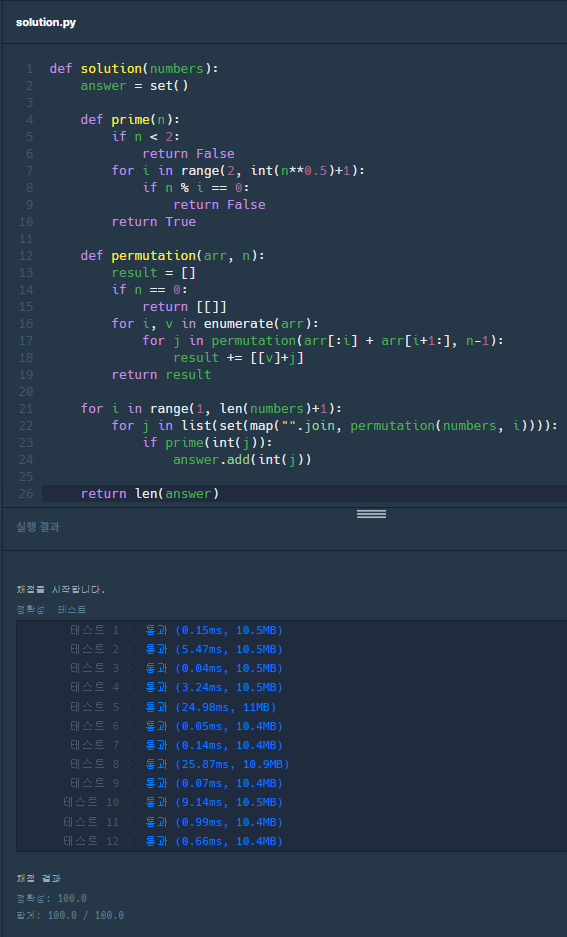

### 풀이 - 파이썬 itertools의 permutations

itertools는 효율적인 루핑을 위한 이터레이터를 만드는 함수로 permutations를 제공하고 있다. 그래서 위에서 직접 구현한 순열 대신에 permutaions 이터레이터를 사용하여 조금 더 간단하게 문제를 해결할 수 있다.



In [4]:
from itertools import permutations
def solution(numbers):
    answer = set()

    def prime(n):
        if n < 2:
            return False
        for i in range(2, int(n**0.5)+1):
            if n % i == 0:
                return False
        return True

    for i in range(1, len(numbers)+1):
        for n in list(set(map("".join, permutations(numbers, i)))):
            if prime(int(n)):
                answer.add(int(n))
    
    return len(answer)

In [5]:
solution("17") # 3

3

In [6]:
solution("011") # 2

2

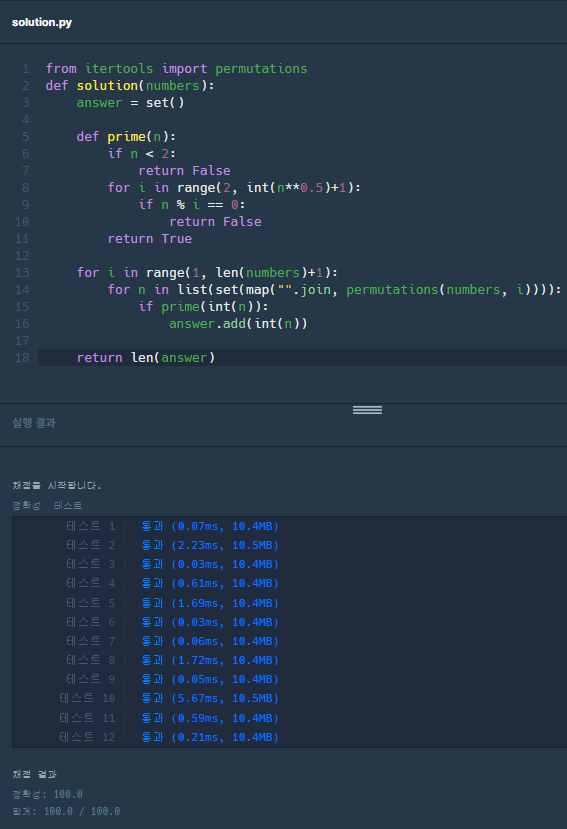